## Exercício de Apoio Semana 05

Use o algoritmo k-médias para agrupar objetos que pertencem a diferentes espécies de arroz. O conjunto de dados deste exercício é mesmo que foi usado no exercício da Semana 4 para classificação com SVM. Faça os seguintes passos: 

- Faça o agrupamento usando todos os atributos, exceto id e Class.
- Reduza a escala dos valores dos atributos para agilizar a execução do código e melhorar a compactação dos dados.
- Para este exercício, o número de clusters já é conhecido, mas você pode alterar os outros parâmetros do algoritmo para melhorar o seu desempenho.
- Use o atributo Class para verificar a acurácia do agrupamento.
- Plote os resultados obtidos pelo classificador.

Qual foi o melhor desempenho que você obteve?

O conjunto de dados contém os atributos descritos a seguir, e está disponível no link abaixo:

[LINK rice-classification.csv](https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/rice-classification.csv)

##### Atributos:

| ATRIBUTOS             | DESCRICAO                              |
| --------------------- | -------------------------------------- |
| id                    | identificador do objeto                |
| Area                  | área do grão                           |
| MajorAxisLength       | tamanho do eixo principal              |
| MinorAxisLength       | tamanho do eixo menor                  |
| Eccentricity          | excentricidade                         |
| ConvexArea            | área convexa                           |
| EquivDiameter         | diâmetro equivalente                   |
| Extent                | extensão                               |
| Perimeter             | perímetro                              |
| Roundness             | redondeza                              |
| AspectRation          | razão de aspecto                       |
| Class (atributo alvo) | tipo de arroz (1 - Jasmine, 0 - Gonen) |

##### Observações:

- A documentação do algoritmo k-médias no scikit-learn está disponível em:

[LINK sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

- Se necessário, use o código apresentado na videoaula 13 (Aplicação do algoritmo Fuzzy C-Means) desta semana. Lá, há exemplos de como reduzir a escala de dados e de como plotar os resultados de agrupamento.

- O dataset deste exercício é baseado no dataset Rice type classification, que está em:

[LINK rice-type-classification](https://www.kaggle.com/datasets/mssmartypants/rice-type-classification)


In [1]:
# 1. Nesta atividade, usaremos as bibliotecas scikit-learn, pandas, numpy e matplotlib. Importe as bibliotecas.

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler

 

plt.rcParams.update({'figure.figsize':[15,10]})

plt.rcParams.update({'font.size': 18})

In [2]:
# 2. Importe a base de dados direto da URL e verifique as primeiras linhas. O arquivo contém 18185 registros.

url = 'https://raw.githubusercontent.com/higoramario/univesp-com410-aprendizado-de-maquinas/main/rice-classification.csv'

arroz = pd.read_csv(url, sep=',')

arroz.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [3]:
# 3. Separando os dados que serão usados para o agrupamento.

forma = arroz[['Area','MajorAxisLength','MinorAxisLength','Eccentricity', 'ConvexArea','EquivDiameter','Extent','Perimeter','Roundness','AspectRation']]

especie = arroz['Class']

especie.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

In [4]:
# 4. Reduzindo a escala dos dados para melhorar o desempenho.

scaler = StandardScaler()

forma = scaler.fit_transform(forma)

In [8]:
# 5. Executando o algoritmo k-médias. O resultado é um array com as classes de cada objeto.

agrupamento = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=1000)

clusters = agrupamento.fit_predict(forma)

clusters

array([0, 1, 1, ..., 1, 1, 1], dtype=int32)

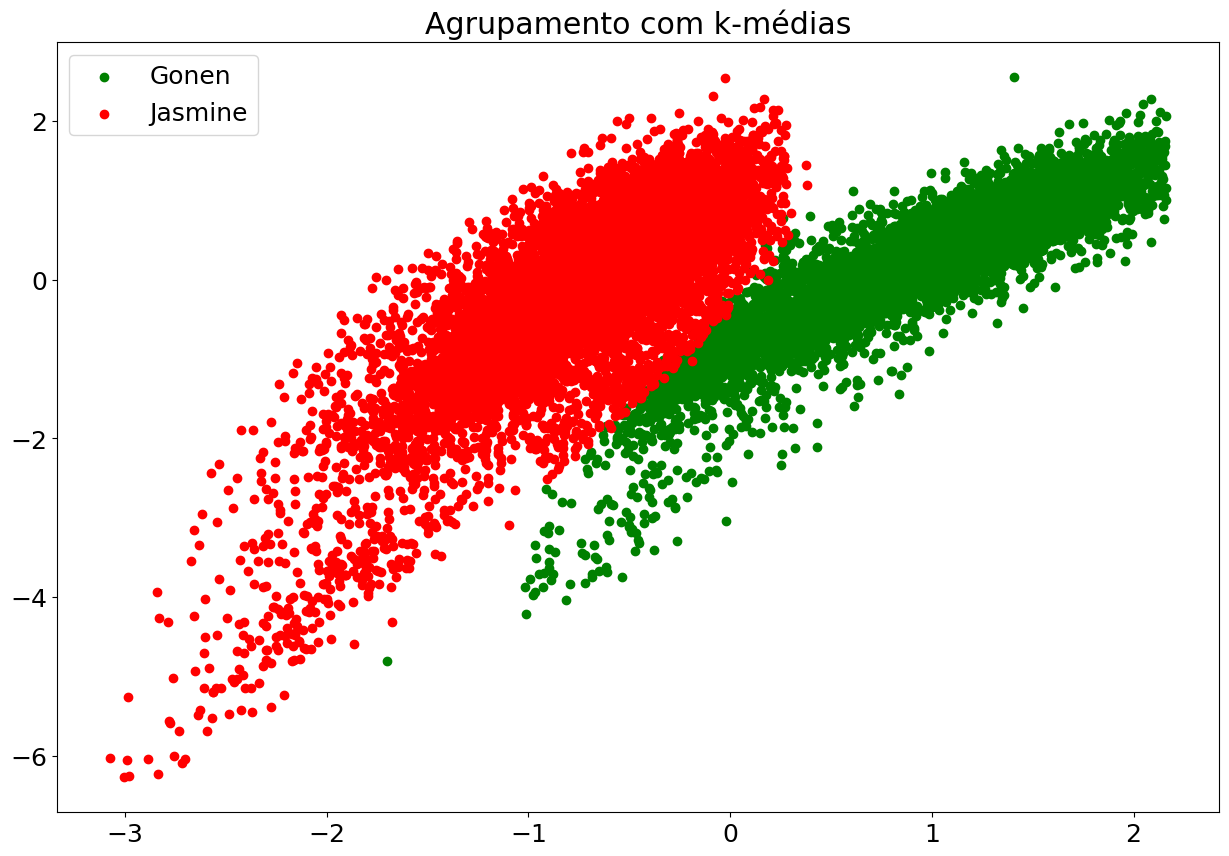

In [9]:
# 6. Plotando o agrupamento com cores distintas.

#O gráfico mostra dois grupos de dados, cada um representado por uma cor: vermelho e verde. A divisão dos grupos indica que os pontos vermelhos estão concentrados na parte superior esquerda do gráfico, enquanto os pontos verdes estão mais na parte inferior direita. Esses grupos foram formados usando o algoritmo de agrupamento k-médias.

plt.scatter(forma[clusters == 0, 0], forma[clusters == 0, 1], c='green',label='Gonen')

plt.scatter(forma[clusters == 1, 0], forma[clusters == 1, 1], c='red',label='Jasmine')

plt.title('Agrupamento com k-médias')

plt.legend()

plt.show()

In [10]:
# 7. Verificando a acurácia obtida.

acuracia = accuracy_score(especie,clusters)

print('Acurácia de agrupamento: {}'.format(round(acuracia,3)*100)+'%')

Acurácia de agrupamento: 97.7%


##### Concluindo

Os resultados do k-médias para este conjunto de dados são bem satisfatórios. O que você achou? Compare com a classificação desses dados com SVM da atividade da semana 4. O resultado de agrupamento foi melhor ou pior?

Lembrando que nesse caso, nós temos as classes às quais os objetos pertencem, o que nos permite calcular a acurácia.

O notebook deste exercício está disponível no link abaixo:

com410-semana-5-exercicio-apoio-clustering-gabarito.ipynb

##### Versões das bibliotecas

- Esse tutorial está usando as seguintes versões de bibliotecas:

matplotlib==3.2.2

numpy==1.21.6

pandas==1.3.5

scikit-learn==1.0.2